In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt


## Lecture de fichier

In [14]:
data = pd.read_csv("../res/annotation/aston_transposon_genome.tab", sep="\t")

In [15]:
data["Index"]=data.index
data = data[data["Chr"]!="*"]
data

Read Name origin TE Name/Fragment origin    Chr  \
0      89fea454-2d1f-47b2-92be-055396d43f08             SINEC2A1_CF  chr12   
1      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B2_CF  chr12   
2      89fea454-2d1f-47b2-92be-055396d43f08               SINEC1_CF  chr12   
3      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B1_CF  chr12   
4      89fea454-2d1f-47b2-92be-055396d43f08              SINEC1A_CF  chr12   
...                                     ...                     ...    ...   
17356  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A1_CF  chr34   
17357  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A2_CF  chr34   
17358  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B2_CF  chr34   
17359  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B1_CF  chr34   
17360  9e76ff10-835b-4496-9873-30ea9d0d9112              SINEC1A_CF  chr34   

          Start       End  Indicator  Index  
0      10125111  10125273          4      0  
1      10125119  10125273          4      1  
2      10125138  10125273          4      2  
3      10125119  10125273          4      3  
4      10125119  10125273          4      4  
...         ...       ...        ...    ...  
17356  13094123  13098611          1  17356  
17357  13098469  13098611          1  17357  
17358  13098455  13098602          1  17358  
17359  13098455  13098602          1  17359  
17360  13098455  13098611          1  17360  

[17042 rows x 7 columns]

In [16]:
data.dtypes

Read Name origin           object
TE Name/Fragment origin    object
Chr                        object
Start                      object
End                        object
Indicator                   int64
Index                       int64
dtype: object

In [17]:
data = data.astype({"Start":int, "End":int})
data.astype({"Start":int, "End":int}).dtypes

Read Name origin           object
TE Name/Fragment origin    object
Chr                        object
Start                       int64
End                         int64
Indicator                   int64
Index                       int64
dtype: object

In [18]:
np.unique(data["Chr"])

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr23', 'chr24', 'chr25', 'chr26', 'chr27', 'chr28',
       'chr29', 'chr3', 'chr30', 'chr31', 'chr32', 'chr33', 'chr34',
       'chr35', 'chr36', 'chr37', 'chr38', 'chr4', 'chr5', 'chr6', 'chr7',
       'chr8', 'chr9', 'chrM', 'chrUn_JAAHUQ010000423v1',
       'chrUn_JAAHUQ010000442v1', 'chrUn_JAAHUQ010000468v1',
       'chrUn_JAAHUQ010000493v1', 'chrUn_JAAHUQ010000502v1',
       'chrUn_JAAHUQ010000570v1', 'chrUn_JAAHUQ010000578v1',
       'chrUn_JAAHUQ010000591v1', 'chrUn_JAAHUQ010000618v1',
       'chrUn_JAAHUQ010000619v1', 'chrUn_JAAHUQ010000679v1',
       'chrUn_JAAHUQ010000685v1', 'chrUn_JAAHUQ010000694v1',
       'chrUn_JAAHUQ010000717v1', 'chrUn_JAAHUQ010000724v1',
       'chrUn_JAAHUQ010000728v1', 'chrUn_JAAHUQ010000790v1',
       'chrUn_JAAHUQ010000847v1', 'chrUn_JAAHUQ010000863v1',
       'chrUn_JAAHUQ010000874v1', 'chrUn_

In [19]:
chr1 = data[data["Chr"]=="chr1"]

In [20]:
chr1.dtypes

Read Name origin           object
TE Name/Fragment origin    object
Chr                        object
Start                       int64
End                         int64
Indicator                   int64
Index                       int64
dtype: object

Méthode "merge interval"

In [9]:
chr1_sinec1b2_cf = chr1[chr1["TE Name/Fragment origin"]=="SINEC1B2_CF"]

In [10]:
chr1_sinec1b2_cf.sort_values("Start", inplace=True)
chr1_sinec1b2_cf

/tmp/ipykernel_12222/2763990952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr1_sinec1b2_cf.sort_values("Start", inplace=True)


Read Name origin TE Name/Fragment origin   Chr  \
13603  d9b69200-3ad2-4719-8639-8431ecdd963e             SINEC1B2_CF  chr1   
4464   c827b229-697d-4c19-a628-05b0a78781ac             SINEC1B2_CF  chr1   
7083   fd2dc030-e870-4887-8faa-d990267c0a04             SINEC1B2_CF  chr1   
7616   3d5523cf-baf6-4876-92d7-02a0349ee414             SINEC1B2_CF  chr1   
4559   d1dbf77e-c6cf-4e55-82e8-d1057fa87afc             SINEC1B2_CF  chr1   
...                                     ...                     ...   ...   
1889   bb00ce10-504f-4344-9dc5-77c3f600da76             SINEC1B2_CF  chr1   
12823  d858bb26-7102-47df-8597-a5e970a81dac             SINEC1B2_CF  chr1   
7406   fe5003dc-828b-4c46-bf6c-5262e061ca0a             SINEC1B2_CF  chr1   
13313  e54e0655-0078-40e5-ade2-a7eda577e96a             SINEC1B2_CF  chr1   
12773  25a8f27e-5353-4b22-b035-816cf5739e31             SINEC1B2_CF  chr1   

           Start        End  Indicator  Index  
13603    3037861    3038016          5  13603  
4464     4197273    4197433          1   4464  
7083     5532643    5532813          1   7083  
7616    10705231   10705370          4   7616  
4559    11983201   11983364          1   4559  
...          ...        ...        ...    ...  
1889   122584286  122584434          1   1889  
12823  122584287  122584437          1  12823  
7406   122584291  122584434          1   7406  
13313  122584299  122584434          1  13313  
12773  123548175  123548326          1  12773  

[149 rows x 7 columns]

In [11]:
chr1_sinec1b2_cf_sorted["group"] = (chr1_sinec1b2_cf_sorted["Start"]>chr1_sinec1b2_cf_sorted["End"].shift().cummax()).cumsum()

NameError: name 'chr1_sinec1b2_cf_sorted' is not defined

In [ ]:
chr1_sinec1b2_cf_sorted

In [ ]:
final = chr1_sinec1b2_cf_sorted.groupby("group").agg({"group":lambda x:int(np.mean(x)),"Start":"min","End":"max","Index":list})


In [ ]:
equivalence = pd.DataFrame(columns=["group","Index"])
final["Chr"] = "chr1"
final["TE Name"] = "SINEC1B2"
final["*"] = "*"
final

In [ ]:
equivalence

In [ ]:
equivalence = pd.concat([equivalence,final[["group","Index"]]])

In [ ]:
equivalence

In [ ]:
intervalles = pd.DataFrame(columns=["Chr","Start","End","TE Name","group","*"])

intervalles = pd.concat([intervalles,final[["Chr","Start","End","TE Name","group","*"]]])

In [ ]:
intervalles

## Débuggage script principal

In [ ]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

In [ ]:
# lecture du fichier

data = pd.read_csv("../res/annotation/aston_transposon_genome.tab", sep="\t")
data

Read Name origin TE Name/Fragment origin    Chr  \
0      89fea454-2d1f-47b2-92be-055396d43f08             SINEC2A1_CF  chr12   
1      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B2_CF  chr12   
2      89fea454-2d1f-47b2-92be-055396d43f08               SINEC1_CF  chr12   
3      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B1_CF  chr12   
4      89fea454-2d1f-47b2-92be-055396d43f08              SINEC1A_CF  chr12   
...                                     ...                     ...    ...   
17356  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A1_CF  chr34   
17357  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A2_CF  chr34   
17358  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B2_CF  chr34   
17359  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B1_CF  chr34   
17360  9e76ff10-835b-4496-9873-30ea9d0d9112              SINEC1A_CF  chr34   

          Start       End  Indicator  
0      10125111  10125273          4  
1      10125119  10125273          4  
2      10125138  10125273          4  
3      10125119  10125273          4  
4      10125119  10125273          4  
...         ...       ...        ...  
17356  13094123  13098611          1  
17357  13098469  13098611          1  
17358  13098455  13098602          1  
17359  13098455  13098602          1  
17360  13098455  13098611          1  

[17361 rows x 6 columns]

In [ ]:
data["Index"]=data.index
data

Read Name origin TE Name/Fragment origin    Chr  \
0      89fea454-2d1f-47b2-92be-055396d43f08             SINEC2A1_CF  chr12   
1      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B2_CF  chr12   
2      89fea454-2d1f-47b2-92be-055396d43f08               SINEC1_CF  chr12   
3      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B1_CF  chr12   
4      89fea454-2d1f-47b2-92be-055396d43f08              SINEC1A_CF  chr12   
...                                     ...                     ...    ...   
17356  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A1_CF  chr34   
17357  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A2_CF  chr34   
17358  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B2_CF  chr34   
17359  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B1_CF  chr34   
17360  9e76ff10-835b-4496-9873-30ea9d0d9112              SINEC1A_CF  chr34   

          Start       End  Indicator  Index  
0      10125111  10125273          4      0  
1      10125119  10125273          4      1  
2      10125138  10125273          4      2  
3      10125119  10125273          4      3  
4      10125119  10125273          4      4  
...         ...       ...        ...    ...  
17356  13094123  13098611          1  17356  
17357  13098469  13098611          1  17357  
17358  13098455  13098602          1  17358  
17359  13098455  13098602          1  17359  
17360  13098455  13098611          1  17360  

[17361 rows x 7 columns]

In [ ]:
data = data[data["Chr"]!="*"]  # on enlève les reads qui ne se retrouve pas sur le génome
data

Read Name origin TE Name/Fragment origin    Chr  \
0      89fea454-2d1f-47b2-92be-055396d43f08             SINEC2A1_CF  chr12   
1      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B2_CF  chr12   
2      89fea454-2d1f-47b2-92be-055396d43f08               SINEC1_CF  chr12   
3      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B1_CF  chr12   
4      89fea454-2d1f-47b2-92be-055396d43f08              SINEC1A_CF  chr12   
...                                     ...                     ...    ...   
17356  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A1_CF  chr34   
17357  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A2_CF  chr34   
17358  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B2_CF  chr34   
17359  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B1_CF  chr34   
17360  9e76ff10-835b-4496-9873-30ea9d0d9112              SINEC1A_CF  chr34   

          Start       End  Indicator  Index  
0      10125111  10125273          4      0  
1      10125119  10125273          4      1  
2      10125138  10125273          4      2  
3      10125119  10125273          4      3  
4      10125119  10125273          4      4  
...         ...       ...        ...    ...  
17356  13094123  13098611          1  17356  
17357  13098469  13098611          1  17357  
17358  13098455  13098602          1  17358  
17359  13098455  13098602          1  17359  
17360  13098455  13098611          1  17360  

[17042 rows x 7 columns]

In [ ]:
data = data.astype({"Start":int, "End":int})
data

Read Name origin TE Name/Fragment origin    Chr  \
0      89fea454-2d1f-47b2-92be-055396d43f08             SINEC2A1_CF  chr12   
1      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B2_CF  chr12   
2      89fea454-2d1f-47b2-92be-055396d43f08               SINEC1_CF  chr12   
3      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B1_CF  chr12   
4      89fea454-2d1f-47b2-92be-055396d43f08              SINEC1A_CF  chr12   
...                                     ...                     ...    ...   
17356  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A1_CF  chr34   
17357  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A2_CF  chr34   
17358  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B2_CF  chr34   
17359  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B1_CF  chr34   
17360  9e76ff10-835b-4496-9873-30ea9d0d9112              SINEC1A_CF  chr34   

          Start       End  Indicator  Index  
0      10125111  10125273          4      0  
1      10125119  10125273          4      1  
2      10125138  10125273          4      2  
3      10125119  10125273          4      3  
4      10125119  10125273          4      4  
...         ...       ...        ...    ...  
17356  13094123  13098611          1  17356  
17357  13098469  13098611          1  17357  
17358  13098455  13098602          1  17358  
17359  13098455  13098602          1  17359  
17360  13098455  13098611          1  17360  

[17042 rows x 7 columns]

In [ ]:
data[data["Chr"]=="chrUn_JAAHUQ010001671v1"]

Read Name origin TE Name/Fragment origin  \
2996  0b227153-bd8a-470a-9402-549c58341876             SINEC2A2_CF   
2997  0b227153-bd8a-470a-9402-549c58341876              SINEC1A_CF   
2998  0b227153-bd8a-470a-9402-549c58341876             SINEC1B1_CF   
2999  0b227153-bd8a-470a-9402-549c58341876             SINEC1B2_CF   

                          Chr  Start    End  Indicator  Index  
2996  chrUn_JAAHUQ010001671v1  16762  16906          1   2996  
2997  chrUn_JAAHUQ010001671v1  16762  16906          1   2997  
2998  chrUn_JAAHUQ010001671v1  16771  16910          1   2998  
2999  chrUn_JAAHUQ010001671v1  16771  16910          1   2999

In [ ]:
liste_chr = np.unique(data["Chr"])
liste_chr

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr23', 'chr24', 'chr25', 'chr26', 'chr27', 'chr28',
       'chr29', 'chr3', 'chr30', 'chr31', 'chr32', 'chr33', 'chr34',
       'chr35', 'chr36', 'chr37', 'chr38', 'chr4', 'chr5', 'chr6', 'chr7',
       'chr8', 'chr9', 'chrM', 'chrUn_JAAHUQ010000423v1',
       'chrUn_JAAHUQ010000442v1', 'chrUn_JAAHUQ010000468v1',
       'chrUn_JAAHUQ010000493v1', 'chrUn_JAAHUQ010000502v1',
       'chrUn_JAAHUQ010000570v1', 'chrUn_JAAHUQ010000578v1',
       'chrUn_JAAHUQ010000591v1', 'chrUn_JAAHUQ010000618v1',
       'chrUn_JAAHUQ010000619v1', 'chrUn_JAAHUQ010000679v1',
       'chrUn_JAAHUQ010000685v1', 'chrUn_JAAHUQ010000694v1',
       'chrUn_JAAHUQ010000717v1', 'chrUn_JAAHUQ010000724v1',
       'chrUn_JAAHUQ010000728v1', 'chrUn_JAAHUQ010000790v1',
       'chrUn_JAAHUQ010000847v1', 'chrUn_JAAHUQ010000863v1',
       'chrUn_JAAHUQ010000874v1', 'chrUn_

In [ ]:
equivalence = pd.DataFrame(columns=["Group","Index"])
intervalles = pd.DataFrame(columns=["Chr","Start","End","TE Name","Group","*"])
equivalence

Empty DataFrame
Columns: [Group, Index]
Index: []

In [ ]:
intervalles

Empty DataFrame
Columns: [Chr, Start, End, TE Name, Group, *]
Index: []

In [ ]:
duree = len(liste_chr)
i = 0
duree

206

In [ ]:
for chromosome in liste_chr[100:120]:
    i+=1
    print(i, " / ",duree)
    df = data[data["Chr"]==chromosome]
    liste_te = np.unique(df["TE Name/Fragment origin"])
    for te in liste_te:
        df_te = df[data["TE Name/Fragment origin"]==te]
        df_te.sort_values("Start", inplace=True)
        df_te["Group"] = (df_te["Start"]>df_te["End"].shift().cummax()).cumsum()
        df_te["Group"] = chromosome + "_" + te + "_" + df_te["Group"].astype(str)
        df_te = df_te.groupby("Group").agg({"Group":lambda x: list(x)[0],"Start":"min","End":"max","Index":list})
        df_te["Chr"] = chromosome
        df_te["TE Name"] = te
        df_te["*"] = "*"

        equivalence = pd.concat([equivalence,df_te[["Group","Index"]]])
        intervalles = pd.concat([intervalles,df_te[["Chr","Start","End","TE Name","Group","*"]]])

        print(chromosome, te, sep=", ")

1  /  206
chrUn_JAAHUQ010001563v1, CfERVF1_LTR
chrUn_JAAHUQ010001563v1, SINEC1A_CF
chrUn_JAAHUQ010001563v1, SINEC1B1_CF
chrUn_JAAHUQ010001563v1, SINEC1B2_CF
chrUn_JAAHUQ010001563v1, SINEC1_CF
chrUn_JAAHUQ010001563v1, SINEC2A2_CF
2  /  206
chrUn_JAAHUQ010001564v1, SINEC1A_CF
chrUn_JAAHUQ010001564v1, SINEC1B2_CF
chrUn_JAAHUQ010001564v1, SINEC1_CF
chrUn_JAAHUQ010001564v1, SINEC2A1_CF
chrUn_JAAHUQ010001564v1, SINEC2A2_CF
3  /  206
chrUn_JAAHUQ010001565v1, CfERVF1_LTR
chrUn_JAAHUQ010001565v1, SINEC1A_CF
chrUn_JAAHUQ010001565v1, SINEC1B1_CF
chrUn_JAAHUQ010001565v1, SINEC1B2_CF
chrUn_JAAHUQ010001565v1, SINEC1_CF
4  /  206
chrUn_JAAHUQ010001568v1, CfERVF1_LTR
chrUn_JAAHUQ010001568v1, SINEC1A_CF
chrUn_JAAHUQ010001568v1, SINEC1B1_CF
chrUn_JAAHUQ010001568v1, SINEC1B2_CF
chrUn_JAAHUQ010001568v1, SINEC1_CF
chrUn_JAAHUQ010001568v1, SINEC2A2_CF
5  /  206
chrUn_JAAHUQ010001569v1, CarLTR11a_LTR
6  /  206
chrUn_JAAHUQ010001570v1, CfERVF1_LTR
chrUn_JAAHUQ010001570v1, SINEC2A2_CF
7  /  206
chrUn_JAAHUQ010

In [ ]:
df_te

Group  \
Group                                                                                
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_0        chrUn_JAAHUQ010001671v1_SINEC2A2_CF_0   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1        chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_10      chrUn_JAAHUQ010001671v1_SINEC2A2_CF_10   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_100    chrUn_JAAHUQ010001671v1_SINEC2A2_CF_100   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1000  chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1000   
...                                                                            ...   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_995    chrUn_JAAHUQ010001671v1_SINEC2A2_CF_995   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_996    chrUn_JAAHUQ010001671v1_SINEC2A2_CF_996   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_997    chrUn_JAAHUQ010001671v1_SINEC2A2_CF_997   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_998    chrUn_JAAHUQ010001671v1_SINEC2A2_CF_998   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_999    chrUn_JAAHUQ010001671v1_SINEC2A2_CF_999   

                                             Start       End  \
Group                                                          
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_0           89       211   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1          506       635   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_10        5493      5723   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_100     221769    221906   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1000  24115394  24115538   
...                                            ...       ...   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_995   24067741  24067895   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_996   24074448  24074593   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_997   24078178  24078322   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_998   24104763  24104905   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_999   24112298  24112450   

                                                                                      Index  \
Group                                                                                         
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_0                                               [11510]   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1                                                [6312]   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_10                                       [11174, 15260]   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_100                                       [9827, 14453]   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1000            [9025, 16654, 10607, 4130, 1716, 10579]   
...                                                                                     ...   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_995                                        [4112, 4030]   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_996                                              [3390]   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_997                                              [4748]   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_998   [14958, 16213, 1614, 15415, 555, 10826, 3996, ...   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_999                                        [4367, 5658]   

                                                              Chr  \
Group                                                               
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_0     chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1     chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_10    chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_100   chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_1000  chrUn_JAAHUQ010001671v1   
...                                                           ...   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_995   chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_996   chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_997   chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_998   chrUn_JAAHUQ010001671v1   
chrUn_JAAHUQ010001671v1_SINEC2A2_CF_999   chrUn_JAAHUQ0100016

In [ ]:
data[data["Index"]==4367]

Read Name origin TE Name/Fragment origin    Chr  \
4367  78ce0206-8435-4db2-a5e4-98ed665aa85a             SINEC2A2_CF  chr22   

         Start       End  Indicator  Index  
4367  24112298  24112445          4   4367

In [ ]:
intervalles["Start"][intervalles["Start"]<0]

chrUn_JAAHUQ010001563v1_SINEC1_CF_0    -6
chrUn_JAAHUQ010001564v1_SINEC1_CF_0    -6
chrUn_JAAHUQ010001565v1_SINEC1_CF_0    -6
chrUn_JAAHUQ010001568v1_SINEC1_CF_0    -6
chrUn_JAAHUQ010001666v1_SINEC1_CF_0    -6
chrUn_JAAHUQ010001670v1_SINEC1_CF_0    -6
Name: Start, dtype: object

In [ ]:

for chromosome in liste_chr:
    i+=1
    print(i, " / ",duree)
    df = data[data["Chr"]==chromosome]
    liste_te = np.unique(df["TE Name/Fragment origin"])
    for te in liste_te:
        df_te = data[data["TE Name/Fragment origin"]==te]
        df_te.sort_values("Start", inplace=True)
        df_te["Group"] = (df_te["Start"]>df_te["End"].shift().cummax()).cumsum()
        df_te["Group"] = chromosome + "_" + te + "_" + df_te["Group"].astype(str)
        df_te = df_te.groupby("Group").agg({"Group":lambda x: list(x)[0],"Start":"min","End":"max","Index":list})
        df_te["Chr"] = chromosome
        df_te["TE Name"] = te
        df_te["*"] = "*"

        equivalence = pd.concat([equivalence,df_te[["Group","Index"]]])
        intervalles = pd.concat([intervalles,df_te[["Chr","Start","End","TE Name","Group","*"]]])

        print(chromosome, te, sep=", ")

print("File output :")
data.to_csv("element_with_index.tab", index=False, sep="\t")
print("element_with_index.tab is for finding original subinterval with index")
equivalence.to_csv("equivalence.tab", index=False, sep="\t")
print("equivalence.csv to find the element which make an intervalle")
intervalles.to_csv("intervalles.bed", header=False, index=False, sep="\t")
print("bed file usefull to represent intervalle feature")

intervalles_saf = pd.DataFrame()
intervalles_saf["GeneID"] = intervalles["TE Name"]
intervalles_saf["Chr"] = intervalles["Chr"]
intervalles_saf["Start"] = intervalles["Start"]
intervalles_saf["End"] = intervalles["End"]
intervalles_saf["Strand"] = "*"

intervalles_saf.to_csv("intervalles.saf", index=False, sep="\t")
print("saf file usefull to represent intervalle feature")


2  /  206
chr1, CarLTR1B2_LTR
chr1, CfERV1a_LTR
chr1, CfERV1z_LTR
chr1, CfERVF1_LTR
chr1, CfERVF2B_LTR
chr1, MLT1A0
chr1, SINEC1A_CF
chr1, SINEC1B1_CF
chr1, SINEC1B2_CF
chr1, SINEC1C1_CF
chr1, SINEC1C2_CF
chr1, SINEC1_CF
chr1, SINEC2A1_CF
chr1, SINEC2A2_CF
chr1, Tigger1a_Car
3  /  206
chr10, CfERV1z_LTR
chr10, MLT1C
chr10, SINEC1A_CF
chr10, SINEC1B1_CF
chr10, SINEC1B2_CF
chr10, SINEC1C1_CF
chr10, SINEC1C2_CF
chr10, SINEC1D_CF
chr10, SINEC1_CF
chr10, SINEC2A1_CF
chr10, SINEC2A2_CF
4  /  206
chr11, CarLTR1B2_LTR
chr11, CfERV1z_LTR
chr11, CfERVF1_LTR
chr11, SINEC1A_CF
chr11, SINEC1B1_CF
chr11, SINEC1B2_CF
chr11, SINEC1C1_CF
chr11, SINEC1C2_CF
chr11, SINEC1_CF
chr11, SINEC2A1_CF
chr11, SINEC2A2_CF
5  /  206
chr12, CarLTR1B1_LTR
chr12, CarLTR1B2_LTR
chr12, CarLTR7
chr12, CfERVF1_LTR
chr12, SINEC1A_CF
chr12, SINEC1B1_CF
chr12, SINEC1B2_CF
chr12, SINEC1C1_CF
chr12, SINEC1C2_CF
chr12, SINEC1_CF
chr12, SINEC2A1_CF
chr12, SINEC2A2_CF
chr12, Tigger2a_Car
6  /  206
chr13, SINEC1A_CF
chr13, SINEC1B

KeyboardInterrupt: 

Méthode sklearn

In [21]:
data

Read Name origin TE Name/Fragment origin    Chr  \
0      89fea454-2d1f-47b2-92be-055396d43f08             SINEC2A1_CF  chr12   
1      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B2_CF  chr12   
2      89fea454-2d1f-47b2-92be-055396d43f08               SINEC1_CF  chr12   
3      89fea454-2d1f-47b2-92be-055396d43f08             SINEC1B1_CF  chr12   
4      89fea454-2d1f-47b2-92be-055396d43f08              SINEC1A_CF  chr12   
...                                     ...                     ...    ...   
17356  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A1_CF  chr34   
17357  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC2A2_CF  chr34   
17358  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B2_CF  chr34   
17359  9e76ff10-835b-4496-9873-30ea9d0d9112             SINEC1B1_CF  chr34   
17360  9e76ff10-835b-4496-9873-30ea9d0d9112              SINEC1A_CF  chr34   

          Start       End  Indicator  Index  
0      10125111  10125273          4      0  
1      10125119  10125273          4      1  
2      10125138  10125273          4      2  
3      10125119  10125273          4      3  
4      10125119  10125273          4      4  
...         ...       ...        ...    ...  
17356  13094123  13098611          1  17356  
17357  13098469  13098611          1  17357  
17358  13098455  13098602          1  17358  
17359  13098455  13098602          1  17359  
17360  13098455  13098611          1  17360  

[17042 rows x 7 columns]

In [22]:
chr1

Read Name origin TE Name/Fragment origin   Chr  \
16     8cb9cc44-795c-4c6b-a8ff-a86d9be5df03             SINEC1B2_CF  chr1   
17     8cb9cc44-795c-4c6b-a8ff-a86d9be5df03             SINEC1B1_CF  chr1   
18     8cb9cc44-795c-4c6b-a8ff-a86d9be5df03               SINEC1_CF  chr1   
19     8cb9cc44-795c-4c6b-a8ff-a86d9be5df03              SINEC1A_CF  chr1   
20     8cb9cc44-795c-4c6b-a8ff-a86d9be5df03             SINEC1C1_CF  chr1   
...                                     ...                     ...   ...   
17337  f6549a8e-5e65-4fff-85cf-c5672739655c               SINEC1_CF  chr1   
17338  f6549a8e-5e65-4fff-85cf-c5672739655c             SINEC1B2_CF  chr1   
17339  f6549a8e-5e65-4fff-85cf-c5672739655c             SINEC1B1_CF  chr1   
17342  03402329-a27b-4ee8-abec-ae24f7b216a0             SINEC2A1_CF  chr1   
17343  03402329-a27b-4ee8-abec-ae24f7b216a0             SINEC2A2_CF  chr1   

           Start        End  Indicator  Index  
16      38406467   38406620          1     16  
17      38406467   38406620          1     17  
18      38406467   38406604          1     18  
19      38406473   38406620          1     19  
20      38406472   38406620          1     20  
...          ...        ...        ...    ...  
17337  102546828  102547320          1  17337  
17338  102546816  102547320          1  17338  
17339  102546816  102547320          1  17339  
17342  102393608  102393779          4  17342  
17343  102393638  102393779          4  17343  

[863 rows x 7 columns]

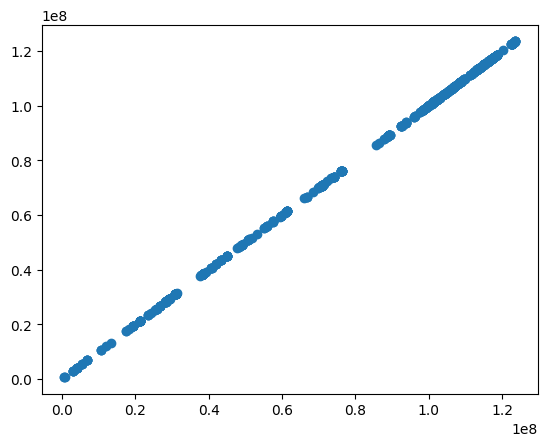

In [70]:
schr1 = chr1.sort_values(by="Start")
plt.scatter(schr1["Start"], schr1["End"])
plt.show()

In [71]:
coord = schr1[["Start","End"]]
coord = coord.values
coord

array([[   645026,    645158],
       [   645026,    645195],
       [   863703,    863887],
       ...,
       [123548175, 123548332],
       [123548175, 123548332],
       [123548175, 123548326]])

In [72]:
len(coord)

863

In [73]:
clf = DBSCAN(1000, min_samples=1)
clf.fit(coord)
clf.labels_

array([  0,   0,   1,   2,   2,   2,   2,   2,   3,   3,   3,   3,   3,
         3,   3,   4,   4,   4,   5,   5,   5,   5,   5,   6,   6,   6,
         7,   8,   9,   9,  10,  11,  11,  11,  11,  11,  11,  11,  11,
        12,  12,  12,  12,  12,  13,  13,  13,  13,  13,  14,  14,  14,
        14,  14,  14,  14,  15,  15,  15,  16,  17,  17,  18,  19,  19,
        19,  20,  20,  20,  20,  20,  20,  20,  21,  21,  22,  22,  23,
        23,  24,  24,  25,  25,  25,  25,  25,  26,  27,  27,  27,  27,
        27,  27,  27,  27,  27,  27,  27,  27,  28,  29,  29,  29,  29,
        29,  29,  29,  29,  29,  29,  30,  31,  32,  32,  32,  32,  32,
        32,  32,  33,  34,  35,  35,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  3

In [80]:
len(np.unique(clf.labels_))

225

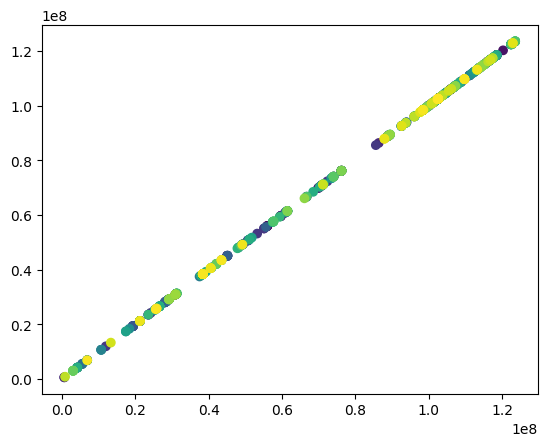

In [81]:
plt.scatter(chr1["Start"], chr1["End"], c=clf.labels_ )
plt.show()

In [93]:
df_te = pd.DataFrame()
df_te["intervalles"] = np.unique(clf.labels_)
clus_interval["sum"] = clus_interval["intervalles"].apply(lambda x: sum(clf.labels_==x))
clus_interval["start"] = clus_interval["intervalles"].apply(lambda x: min(schr1[clf.labels_==x]["Start"]))
clus_interval["end"] = clus_interval["intervalles"].apply(lambda x: max(schr1[clf.labels_==x]["End"]))
clus_interval

intervalles  sum      start        end
0              0    2     645026     645195
1              1    1     863703     863887
2              2    5    3037856    3038023
3              3    7    4197261    4197448
4              4    3    5532643    5532813
..           ...  ...        ...        ...
220          220    4  122416129  122416297
221          221   20  122583025  122584443
222          222    2  122908750  122908933
223          223    1  123399578  123400067
224          224    5  123548175  123548332

[225 rows x 4 columns]

In [95]:
clus_interval.sort_values(by="sum")

intervalles  sum      start        end
69            69    1   66112169   66112306
62            62    1   59353738   59355073
185          185    1  113286780  113286908
158          158    1  106120914  106121334
186          186    1  113308807  113308935
..           ...  ...        ...        ...
27            27   12   29158689   29159044
162          162   16  106920313  106920476
221          221   20  122583025  122584443
139          139   82  102546816  102547320
36            36  111   38406467   38406633

[225 rows x 4 columns]

In [3]:
path = "../res/annotation/chimera/chrystalPoumon_chimera_genome.tsv"

In [4]:
data = pd.read_csv(path, sep="\t")
data

Read Name origin TE Name/Fragment origin    Chr  \
0       c9290b19-a6c3-4c10-97df-4082c7b23aa0              SINEC1A_CF  chr13   
1       87659238-44ff-435c-a117-decf819d5df3              SINEC1A_CF  chr13   
2       87659238-44ff-435c-a117-decf819d5df3              SINEC1A_CF  chr13   
3       1daa95c0-3a26-4654-836d-356caddbdcfa             SINEC1C2_CF  chr18   
4       a78dca4a-7e24-48a7-a3d8-3a737ae5dcaa             SINEC2A1_CF      *   
...                                      ...                     ...    ...   
251598  e21a202d-8fd0-4857-a938-b1521d78fdd4             SINEC2A1_CF  chr14   
251599  f28fa9e3-870b-4497-9536-99c660b0c7b3             SINEC2A1_CF   chr1   
251600  bbca50c1-8b82-4131-9069-9b4df243442e             SINEC1B1_CF  chr13   
251601  d1414d48-325f-40d5-ada0-4088aba00608              SINEC1A_CF  chr13   
251602  d1414d48-325f-40d5-ada0-4088aba00608              SINEC1A_CF  chr13   

           Start       End  Indicator  
0       63567301  63567448          1  
1       63566984  63567164          1  
2       63567301  63567457          1  
3       32094252  32094406          1  
4              *         *          0  
...          ...       ...        ...  
251598   6647529   6647711          1  
251599  96815528  96815718          3  
251600  63567309  63567456          1  
251601  63566485  63566485          1  
251602  63567301  63567439          1  

[251603 rows x 6 columns]

In [5]:
data = data[data["Chr"]!="*"]  # on enlève les reads qui ne se retrouve pas sur le génome

data = data.astype({"Start":int, "End":int})

data

Read Name origin TE Name/Fragment origin    Chr  \
0       c9290b19-a6c3-4c10-97df-4082c7b23aa0              SINEC1A_CF  chr13   
1       87659238-44ff-435c-a117-decf819d5df3              SINEC1A_CF  chr13   
2       87659238-44ff-435c-a117-decf819d5df3              SINEC1A_CF  chr13   
3       1daa95c0-3a26-4654-836d-356caddbdcfa             SINEC1C2_CF  chr18   
5       9377853c-2236-4158-9ced-ba4a15f47eb5             SINEC1C2_CF   chr1   
...                                      ...                     ...    ...   
251598  e21a202d-8fd0-4857-a938-b1521d78fdd4             SINEC2A1_CF  chr14   
251599  f28fa9e3-870b-4497-9536-99c660b0c7b3             SINEC2A1_CF   chr1   
251600  bbca50c1-8b82-4131-9069-9b4df243442e             SINEC1B1_CF  chr13   
251601  d1414d48-325f-40d5-ada0-4088aba00608              SINEC1A_CF  chr13   
251602  d1414d48-325f-40d5-ada0-4088aba00608              SINEC1A_CF  chr13   

            Start        End  Indicator  
0        63567301   63567448          1  
1        63566984   63567164          1  
2        63567301   63567457          1  
3        32094252   32094406          1  
5       112205512  112205639          1  
...           ...        ...        ...  
251598    6647529    6647711          1  
251599   96815528   96815718          3  
251600   63567309   63567456          1  
251601   63566485   63566485          1  
251602   63567301   63567439          1  

[208965 rows x 6 columns]

In [6]:
liste_chr = np.unique(data["Chr"])
liste_chr

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr23', 'chr24', 'chr25', 'chr26', 'chr27', 'chr28',
       'chr29', 'chr3', 'chr30', 'chr31', 'chr32', 'chr33', 'chr34',
       'chr35', 'chr36', 'chr37', 'chr38', 'chr4', 'chr5', 'chr6', 'chr7',
       'chr8', 'chr9', 'chrM', 'chrUn_JAAHUQ010000411v1',
       'chrUn_JAAHUQ010000416v1', 'chrUn_JAAHUQ010000423v1',
       'chrUn_JAAHUQ010000438v1', 'chrUn_JAAHUQ010000439v1',
       'chrUn_JAAHUQ010000456v1', 'chrUn_JAAHUQ010000468v1',
       'chrUn_JAAHUQ010000493v1', 'chrUn_JAAHUQ010000502v1',
       'chrUn_JAAHUQ010000514v1', 'chrUn_JAAHUQ010000523v1',
       'chrUn_JAAHUQ010000540v1', 'chrUn_JAAHUQ010000550v1',
       'chrUn_JAAHUQ010000561v1', 'chrUn_JAAHUQ010000562v1',
       'chrUn_JAAHUQ010000568v1', 'chrUn_JAAHUQ010000584v1',
       'chrUn_JAAHUQ010000594v1', 'chrUn_JAAHUQ010000596v1',
       'chrUn_JAAHUQ010000601v1', 'chrUn_

In [7]:
intervalles = pd.DataFrame(columns=["Chr","Start","End","TE Name","Group","Count"])
duree = len(liste_chr)
i = 0


In [13]:
# step 1

chromosome = liste_chr[4]
i+=1
if i%15==0:
    print(i, " / ",duree) 
df = data[data["Chr"]==chromosome]
df

Read Name origin TE Name/Fragment origin    Chr  \
0       c9290b19-a6c3-4c10-97df-4082c7b23aa0              SINEC1A_CF  chr13   
1       87659238-44ff-435c-a117-decf819d5df3              SINEC1A_CF  chr13   
2       87659238-44ff-435c-a117-decf819d5df3              SINEC1A_CF  chr13   
25      afd434aa-7746-457e-9dbf-91ade35b7cc2              SINEC1A_CF  chr13   
27      9bfdc452-6dfe-4b35-8a74-59c86f90df0a              SINEC1A_CF  chr13   
...                                      ...                     ...    ...   
251596  114aa459-d95d-4220-a522-c17581c74923              SINEC1A_CF  chr13   
251597  114aa459-d95d-4220-a522-c17581c74923              SINEC1A_CF  chr13   
251600  bbca50c1-8b82-4131-9069-9b4df243442e             SINEC1B1_CF  chr13   
251601  d1414d48-325f-40d5-ada0-4088aba00608              SINEC1A_CF  chr13   
251602  d1414d48-325f-40d5-ada0-4088aba00608              SINEC1A_CF  chr13   

           Start       End  Indicator  
0       63567301  63567448          1  
1       63566984  63567164          1  
2       63567301  63567457          1  
25      63567301  63567457          1  
27      63567301  63567457          1  
...          ...       ...        ...  
251596  63567301  63567457          1  
251597  63566923  63567100          1  
251600  63567309  63567456          1  
251601  63566485  63566485          1  
251602  63567301  63567439          1  

[48781 rows x 6 columns]

In [14]:
#numpy-isation
coord = df[["Start","End"]]
coord = coord.values

In [15]:
#clustering
clf = DBSCAN(1000, min_samples=1, algorithm="kd_tree")
clf.fit(coord)

In [26]:
df_te = pd.DataFrame()
df_te["Group"] = np.unique(clf.labels_)
df_te["Count"] = df_te["Group"].apply(lambda x: sum(clf.labels_==x))
df_te

Group  Count
0         0     21
1         1      3
2         2    773
3         3      2
4         4      7
...     ...    ...
1727   1727      1
1728   1728      1
1729   1729      2
1730   1730      2
1731   1731      1

[1732 rows x 2 columns]

In [29]:
df_te["Start"] = df_te["Group"].apply(lambda x: min(df[clf.labels_==x]["Start"]))
df_te["End"] = df_te["Group"].apply(lambda x: max(df[clf.labels_==x]["End"]))
df_te["Chr"] = chromosome


In [22]:
df_te = pd.DataFrame()
df_te["Group"] = np.unique(clf.labels_)
df_te["Count"] = df_te["Group"].apply(lambda x: sum(clf.labels_==x))
df_te["Start"] = df_te["Group"].apply(lambda x: min(df[clf.labels_==x]["Start"]))
df_te["End"] = df_te["Group"].apply(lambda x: max(df[clf.labels_==x]["End"]))
df_te["Chr"] = chromosome
df_te["TE Name"] = "multi"

intervalles = pd.concat([intervalles,df_te])


KeyboardInterrupt: 